<a href="https://colab.research.google.com/github/nahidislamz/Kaggle-competition/blob/main/Titanic_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Preparing data

**Looking for missing values**

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Cleaning the Data**

In [ ]:
def clean_data(data):
  ## Dropping Unnecessary Columns
  data.drop(['PassengerId','Cabin', 'Ticket', 'Name'], axis = 1, inplace = True)
  #### Handling Missing Values
  ## Fill missing AGE and FARE with Median
  data['Age'].fillna(data['Age'].median(), inplace=True)
  # data['Fare'].fillna(data['Fare'].median(), inplace=True)
  ## Fill missing EMBARKED with Mode
  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
clean_data(train_data)

In [ ]:
## deleting Fare values grater than 270
train_data.drop(train_data[(train_data['Fare'] > 270)].index, inplace=True)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Handling missing values**

In [ ]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#Data Preprocessing

In [ ]:
train_data['Sex'] = train_data['Sex'].apply(lambda x:1 if x == 'male' else 0)
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


#Preparing Test data

In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
clean_data(test_data)

In [ ]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [ ]:
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_data['Embarked'] = test_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [ ]:
test_data.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
183,3,1,27.0,0,0,7.75,2
221,3,1,21.0,0,0,8.05,0
322,2,1,26.0,0,0,13.00,0
185,2,1,40.0,0,0,16.00,0
391,1,0,51.0,0,1,39.40,0


In [ ]:
test_data.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

#Model Building

In [ ]:
X = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)



lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classofocation Report : -\n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.7929577464788733
Test Accuracy of Logistic Regression is 0.8146067415730337
Confusion Matrix :- 
 [[86 18]
 [15 59]]
Classofocation Report : -
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       104
           1       0.77      0.80      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9830985915492958
Test Accuracy of Decision Tree Classifier is 0.7752808988764045 

Confusion Matrix :- 
[[84 20]
 [20 54]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       104
           1       0.73      0.73      0.73        74

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9830985915492958
Test Accuracy of Random Forest Classifier is 0.8202247191011236 

Confusion Matrix :- 
[[87 17]
 [15 59]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       104
           1       0.78      0.80      0.79        74

    accuracy                           0.82       178
   macro avg       0.81      0.82      0.82       178
weighted avg       0.82      0.82      0.82       178



##Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9126760563380282
Test Accuracy of Gradient Boosting Classifier is 0.848314606741573 

Confusion Matrix :- 
[[95  9]
 [18 56]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       104
           1       0.86      0.76      0.81        74

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



## XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")


Training Accuracy of XgBoost is 0.9309859154929577
Test Accuracy of XgBoost is 0.8539325842696629 

Confusion Matrix :- 
[[91 13]
 [13 61]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.82      0.82      0.82        74

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178



## Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier',
             'Gradient Boosting Classifier', 'XgBoost'],
    'Score' : [lr_acc, dtc_acc, rd_clf_acc, gb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XgBoost,0.853933
3,Gradient Boosting Classifier,0.848315
2,Random Forest Classifier,0.820225
0,Logistic Regression,0.814607
1,Decision Tree Classifier,0.775281


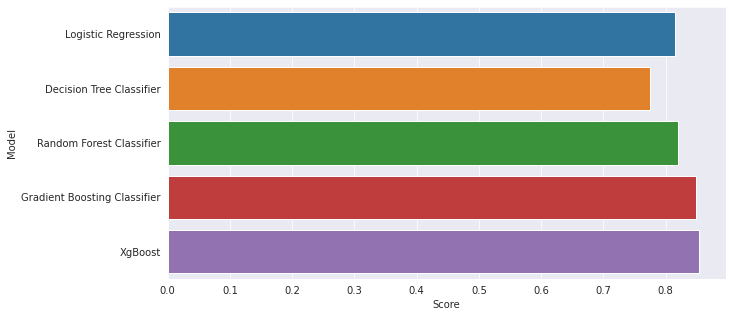

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

##Performing Best Possible Accurate Prediction

In [ ]:
xgb_prediction = xgb.predict(test_data)
prediction = pd.DataFrame(xgb_prediction)
submission = pd.read_csv('/content/gender_submission.csv')
submission['Survived'] = prediction
submission.to_csv('Submission.csv', index = False)